# Feature Selection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("../Datasets/Companies/SmallCompanies.csv")

df.head()

,unique_id,disbursement_date,ssbci_original_funds,lender_insurance_premium,metro_type,LMI_type,revenue,naics_code,jobs_created,jobs_retained,lender_type_category,optional_primary_use_of_funds,optional_revenue_yr_confirmed,optional_stage,active_status,support_amount,full_time_employees
0,AK_2013_VCP_1,3/1/2013,90000.0,0.0,Metro,Non-LMI,0.0,541511,3.0,1.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0,5.0
1,AK_2013_VCP_3,12/30/2013,110000.0,0.0,Metro,Non-LMI,0.0,541511,2.0,5.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0,7.0
2,AK_2014_VCP_1,4/11/2014,99750.0,0.0,Metro,Non-LMI,0.0,336612,8.0,0.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0,2.0
3,AK_2014_VCP_2,5/15/2014,62500.0,0.0,Metro,LMI,1494916.0,451110,8.0,0.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0,8.0
4,AK_2014_VCP_3,9/15/2014,60000.0,0.0,Metro,Non-LMI,41000.0,336612,0.0,0.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0,0.0


In [3]:
print("Dataset dimensions:", df.shape)

Dataset dimensions: (18584, 17)


In [4]:
# Get concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      18584 non-null  object 
 1   disbursement_date              18584 non-null  object 
 2   ssbci_original_funds           18584 non-null  float64
 3   lender_insurance_premium       18584 non-null  float64
 4   metro_type                     18584 non-null  object 
 5   LMI_type                       18584 non-null  object 
 6   revenue                        18584 non-null  float64
 7   naics_code                     18584 non-null  int64  
 8   jobs_created                   18584 non-null  float64
 9   jobs_retained                  18584 non-null  float64
 10  lender_type_category           18584 non-null  object 
 11  optional_primary_use_of_funds  18584 non-null  object 
 12  optional_revenue_yr_confirmed  18584 non-null 

In [5]:
# Filter out the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of unique values for each categorical column
unique_counts_categorical = df[categorical_columns].nunique()

unique_counts_categorical

unique_id                        18563
disbursement_date                 1572
metro_type                           2
LMI_type                             2
lender_type_category                 6
optional_primary_use_of_funds        5
optional_stage                       5
active_status                       10
dtype: int64

## Encoding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      18584 non-null  object 
 1   disbursement_date              18584 non-null  object 
 2   ssbci_original_funds           18584 non-null  float64
 3   lender_insurance_premium       18584 non-null  float64
 4   metro_type                     18584 non-null  object 
 5   LMI_type                       18584 non-null  object 
 6   revenue                        18584 non-null  float64
 7   naics_code                     18584 non-null  int64  
 8   jobs_created                   18584 non-null  float64
 9   jobs_retained                  18584 non-null  float64
 10  lender_type_category           18584 non-null  object 
 11  optional_primary_use_of_funds  18584 non-null  object 
 12  optional_revenue_yr_confirmed  18584 non-null 

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df.select_dtypes(include=['object']):
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,unique_id,disbursement_date,ssbci_original_funds,lender_insurance_premium,metro_type,LMI_type,revenue,naics_code,jobs_created,jobs_retained,lender_type_category,optional_primary_use_of_funds,optional_revenue_yr_confirmed,optional_stage,active_status,support_amount,full_time_employees
0,0,627,90000.0,0.0,0,1,0.0,541511,3.0,1.0,3,4,2014.0,0,8,0.0,5.0
1,1,481,110000.0,0.0,0,1,0.0,541511,2.0,5.0,3,4,2014.0,0,8,0.0,7.0
2,2,768,99750.0,0.0,0,1,0.0,336612,8.0,0.0,3,4,2014.0,0,8,0.0,2.0
3,3,923,62500.0,0.0,0,0,1494916.0,451110,8.0,0.0,3,4,2014.0,0,8,0.0,8.0
4,4,1470,60000.0,0.0,0,1,41000.0,336612,0.0,0.0,3,4,2014.0,0,8,0.0,0.0


## Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

scaled_df.head()

,unique_id,disbursement_date,ssbci_original_funds,lender_insurance_premium,metro_type,LMI_type,revenue,naics_code,jobs_created,jobs_retained,lender_type_category,optional_primary_use_of_funds,optional_revenue_yr_confirmed,optional_stage,active_status,support_amount,full_time_employees
0,-1.732158,-0.372615,0.467348,-0.317853,-0.342781,0.888443,-0.041744,0.150195,0.104501,-0.402871,0.671973,0.557309,0.092237,-0.148228,0.21787,-0.187724,0.540698
1,-1.731971,-0.689557,0.627048,-0.317853,-0.342781,0.888443,-0.041744,0.150195,-0.013027,0.445607,0.671973,0.557309,0.092237,-0.148228,0.21787,-0.187724,1.167584
2,-1.731784,-0.066527,0.545202,-0.317853,-0.342781,0.888443,-0.041744,-1.068931,0.692143,-0.614991,0.671973,0.557309,0.092237,-0.148228,0.21787,-0.187724,-0.399632
3,-1.731598,0.269952,0.247762,-0.317853,-0.342781,-1.125564,0.037716,-0.387681,0.692143,-0.614991,0.671973,0.557309,0.092237,-0.148228,0.21787,-0.187724,1.481027
4,-1.731411,1.457399,0.227799,-0.317853,-0.342781,0.888443,-0.039564,-1.068931,-0.248084,-0.614991,0.671973,0.557309,0.092237,-0.148228,0.21787,-0.187724,-1.026518


## PCA

In [9]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want
pca = PCA(n_components=16)

# Fit PCA to the scaled data
pca.fit(scaled_df)

# Transform the data to the new feature space
transformed_data = pca.transform(scaled_df)

# Convert the transformed data to a DataFrame
selected_features = pd.DataFrame(transformed_data, columns=[f'PC{i}' for i in range(1, 17)])


selected_features



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.460663,0.285032,0.304826,0.495072,-0.518164,-0.184233,0.676489,-0.206400,0.419394,-0.655947,-0.231983,-0.668384,0.689998,0.784166,0.140552,-1.208965
1,0.002523,0.813815,0.017864,1.001923,-0.391401,-0.287439,0.880666,-0.469571,0.095609,-0.674550,-0.469081,-0.873083,0.642629,0.882767,0.239622,-1.201203
2,-0.653060,-0.005473,0.948043,0.012151,-0.432001,-0.861999,0.925857,0.188971,0.541473,-0.299686,0.831156,-0.552833,0.737962,0.608243,0.096772,-1.281683
3,-0.490731,0.500980,0.320469,1.019187,-0.367732,-0.372694,-0.208648,0.181478,-0.895529,0.619462,0.262634,-0.459840,0.444780,0.714179,-0.117395,-1.159285
4,-1.220821,-0.307578,0.650011,-0.464062,-0.604424,-1.377387,-0.013532,1.243359,0.642928,-0.371634,0.379532,-0.578027,0.902070,0.387898,0.112770,-1.281464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18579,0.832726,-0.521004,2.100682,-0.899477,0.137758,2.197056,0.155456,-0.849512,-0.223681,1.444015,-1.236850,-0.808156,-0.213786,-4.150434,0.202167,1.683738
18580,2.090074,-0.263565,-0.220011,-0.324211,0.681265,0.086462,1.156819,-0.882862,-0.007450,-0.068076,-0.738751,-1.289800,-0.721882,-2.395890,0.136706,0.739390
18581,2.547100,-0.200957,0.391550,-1.029845,2.032224,1.957563,-0.801266,-1.564598,-1.657998,0.495651,-1.282225,-0.134371,0.455606,-1.792276,1.118029,0.749676
18582,0.821157,-1.433095,0.465697,-0.519498,0.893582,1.341062,0.292671,-0.934381,0.999843,-1.044020,-0.195356,-0.120962,-1.261669,-2.796271,0.038939,0.295747


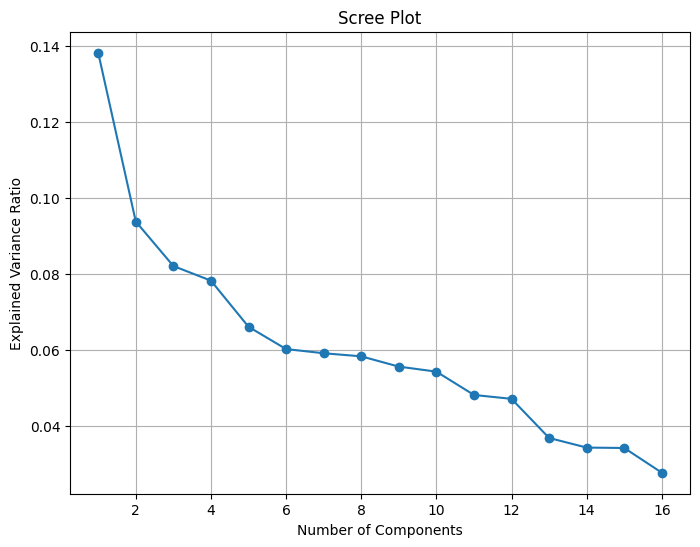

In [10]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

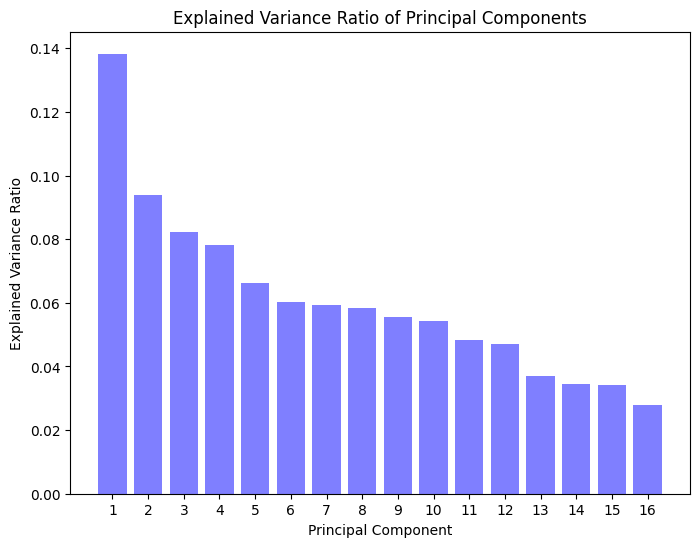

In [11]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, color='blue', alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()


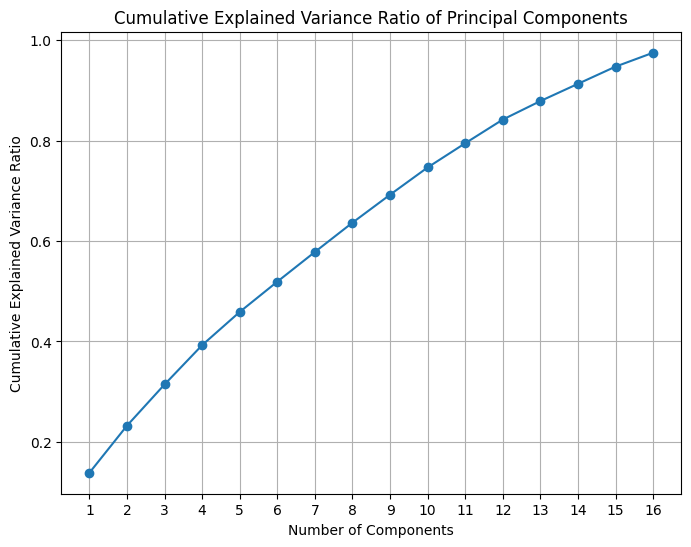

In [12]:

# Assuming pca is your PCA object
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio_cumulative) + 1))
plt.grid(True)
plt.show()
